In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def formatarq(txt,nm):
  with open(txt, 'r') as fd:
    txt = fd.read()  # Ler todo o arquivo
  txt = txt.replace('|',',')
  txt = txt.replace(' ','')
  with open(nm, 'w') as fd:
    fd.write(txt)

In [3]:
formatarq('exp_cluster1.txt','cluster1.txt')
formatarq('exp_cluster2.txt','cluster2.txt')

In [5]:
cl1 = pd.read_csv('cluster1.txt')
cl2 = pd.read_csv('cluster2.txt')

In [6]:
print(cl1['AvgLatency(s)'])

0        0.88
1        0.90
2        0.90
3        0.86
4        0.87
        ...  
105    306.86
106    295.78
107    297.50
108    327.75
109    301.24
Name: AvgLatency(s), Length: 110, dtype: float64


In [ ]:
print(cl2['AvgLatency(s)'])

0        1.07
1        0.85
2        0.86
3        0.87
4        0.85
        ...  
105    205.12
106    202.18
107    218.44
108    211.45
109    199.48
Name: AvgLatency(s), Length: 110, dtype: float64


In [8]:
def mediaLat(cl):
  mdlt = []
  rdns = cl['AvgLatency(s)']
  partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
  for i in partes:
    mdlt.append(np.mean(i))
  return mdlt

In [9]:
mdlt1 = mediaLat(cl1)
mdlt2 = mediaLat(cl2)

In [10]:
print(mdlt1)
print(mdlt2)

[0.897, 0.649, 1.409, 2.4229999999999996, 2.481, 115.199, 4.848000000000001, 7.085000000000001, 7.107000000000001, 8.457, 308.81399999999996]
[0.8959999999999999, 0.653, 8.766, 3.386, 3.784, 104.697, 6.65, 8.466999999999999, 9.939, 11.5, 207.375]


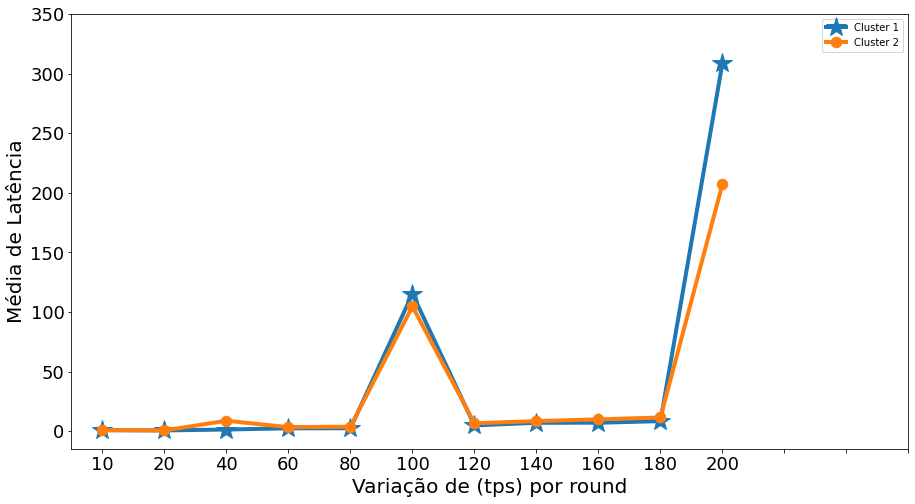

In [11]:
x = [10, 20, 40, 60,80, 100, 120,140, 160,180, 200]

fig,ax = plt.subplots(figsize =(15,8))
#ax.set_title('Ethereum Provider - t2.2xlarge')
ax.set_xlabel('Variação de (tps) por round', fontsize=20)
ax.set_ylabel('Média de Latência', fontsize=20)

#ax.grid(linestyle='dotted')
ax.plot(mdlt1, marker="*", label="Cluster 1", linewidth=4, markersize=20)
ax.plot(mdlt2, marker=".", label="Cluster 2", linewidth=4, markersize=21)
ax.set_xticks(range(14))
ax.set_xticklabels(x, fontsize=18)
plt.yticks([0, 50, 100, 150, 200, 250,300,350], fontsize=18)
plt.legend()
plt.savefig('analise_medlat_rouds.pdf')
plt.show()